# 5. Bringing it all together

Kita akan menyatukan semua yang telah Anda pelajari dalam kursus ini sambil bekerja dengan data yang direkam dari Olimpiade Musim Panas yang berlangsung hingga tahun 1896! Ini adalah dataset yang kaya, yang akan memungkinkan Anda untuk sepenuhnya menerapkan teknik manipulasi data yang telah Anda pelajari. Anda akan pivot, unstack, group, slice, dan reshape kembali data Anda saat Anda menjelajahi dataset ini dan mengungkap beberapa wawasan yang benar-benar menarik.

## Case Study - Summer Olympics

### Grouping and aggregating

Data medali Olimpiade untuk latihan berikut ini berasal dari [The Guardian](https://www.theguardian.com/sport/datablog/2012/jun/25/olympic-medal-winner-list-data). Ini terdiri dari catatan semua acara yang diadakan di Olimpiade antara 1896 dan 2012.

Misalkan Anda telah memuat data ke dalam DataFrame `medals`. Anda sekarang ingin menemukan jumlah total medali yang diberikan ke USA per edisi. Untuk melakukan ini, filter baris `'USA'` dan gunakan fungsi `.groupby()` untuk meletakkan kolom `'Edition'` pada indeks:

<pre>
USA_edition_grouped = medals.loc[medals.NOC == 'USA'].groupby('Edition')
</pre>

Mengingat tujuan untuk menemukan jumlah total medali USA yang diberikan per edisi, kolom apa yang harus Anda pilih dan metode agregasi mana yang harus Anda gunakan?

In [1]:
# Import pandas
import pandas as pd

# Assign url file
filename = 'https://assets.datacamp.com/production/repositories/502/datasets/bf22326ecc9171f68796ad805a7c1135288120b6/all_medalists.csv'

# Load data
medals = pd.read_csv(filename)
medals.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [2]:
# Group 'USA' by 'Edition'
USA_edition_grouped = medals.loc[medals.NOC == 'USA'].groupby('Edition')

# Count medals
USA_edition_grouped['Medal'].count()

Edition
1896     20
1900     55
1904    394
1908     63
1912    101
1920    193
1924    198
1928     84
1932    181
1936     92
1948    148
1952    130
1956    118
1960    112
1964    150
1968    149
1972    155
1976    155
1984    333
1988    193
1992    224
1996    260
2000    248
2004    264
2008    315
Name: Medal, dtype: int64

### Using .value_counts() for ranking

Untuk latihan ini, Anda akan menggunakan metode Pandas Series `.value_counts()` untuk menentukan 15 negara teratas yang diberi peringkat berdasarkan jumlah total medali.

Perhatikan bahwa `.value_counts()` diurutkan berdasarkan nilai secara default. Hasilnya dikembalikan sebagai Series jumlah yang diindeks oleh entri unik dari Series asli dengan nilai (jumlah) yang diperingkat dalam urutan menurun.

In [5]:
# Select the 'NOC' column of medals: country_names
country_names = medals['NOC']

# Count the number of medals won by each country: medal_counts
medal_counts = country_names.value_counts()

# Print top 15 countries ranked by medals
print(medal_counts.head(15))

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
GER    1211
AUS    1075
HUN    1053
SWE    1021
GDR     825
NED     782
JPN     704
CHN     679
RUS     638
ROU     624
Name: NOC, dtype: int64


**Note** : Sepertinya 5 negara teratas di sini adalah `USA`, `URS`, `GBR`, `FRA`, and `ITA`.

### Using .pivot_table() to count medals by type

Daripada memeringkat negara dengan total medali yang dimenangkan dan menunjukkan daftar itu, Anda mungkin ingin melihat sedikit lebih detail. Anda dapat menggunakan tabel pivot untuk menghitung berapa banyak medali perunggu, perak, dan emas yang dimenangkan setiap negara. Tabel pivot itu kemudian dapat digunakan untuk mengulangi perhitungan sebelumnya untuk memberi peringkat berdasarkan total medali yang dimenangkan.

Dalam latihan ini, Anda akan menggunakan `.pivot_table()` terlebih dahulu untuk mengagregasi total medali berdasarkan tipe. Lalu, Anda bisa menggunakan `.sum()` di sepanjang kolom tabel pivot untuk menghasilkan kolom baru. Ketika tabel pivot yang dimodifikasi diurutkan berdasarkan kolom total medali, Anda dapat menampilkan hasil dari latihan terakhir dengan sedikit lebih detail.

In [6]:
# Construct the pivot table: counted
counted = medals.pivot_table(index='NOC', columns='Medal', values='Athlete', aggfunc='count')

# Create the new column: counted['totals']
counted['totals'] = counted.sum(axis='columns')

# Sort counted by the 'totals' column
counted = counted.sort_values('totals', ascending=False)

# Print the top 15 rows of counted
print(counted.head(15))

Medal  Bronze    Gold  Silver  totals
NOC                                  
USA    1052.0  2088.0  1195.0  4335.0
URS     584.0   838.0   627.0  2049.0
GBR     505.0   498.0   591.0  1594.0
FRA     475.0   378.0   461.0  1314.0
ITA     374.0   460.0   394.0  1228.0
GER     454.0   407.0   350.0  1211.0
AUS     413.0   293.0   369.0  1075.0
HUN     345.0   400.0   308.0  1053.0
SWE     325.0   347.0   349.0  1021.0
GDR     225.0   329.0   271.0   825.0
NED     320.0   212.0   250.0   782.0
JPN     270.0   206.0   228.0   704.0
CHN     193.0   234.0   252.0   679.0
RUS     240.0   192.0   206.0   638.0
ROU     282.0   155.0   187.0   624.0


**Note** : Luangkan waktu sejenak untuk melihat hasilnya dan lihat apakah Anda menemukan sesuatu yang menarik!

## Understanding the column labels

### Applying .drop_duplicates()

Apa yang bisa menjadi perbedaan antara kolom `'Event_gender'` dan `'Gender'`? Anda harus dapat mengevaluasi tebakan Anda dengan melihat nilai unik pasangan `(Event_gender, Gender)` dalam data. Secara khusus, Anda seharusnya tidak melihat sesuatu seperti `(Event_gender = 'M', Gender = 'Women')`. Namun, Anda akan melihat bahwa, anehnya, ada pengamatan dengan `(Event_gender = 'W', Gender = 'Men')`.

Duplikat dapat dihapus menggunakan metode `.drop_duplicates()`, meninggalkan pengamatan unik.

In [7]:
# Select columns: ev_gen
ev_gen = medals[['Event_gender', 'Gender']]

# Drop duplicate pairs: ev_gen_uniques
ev_gen_uniques = ev_gen.drop_duplicates()

# Print ev_gen_uniques
print(ev_gen_uniques)

      Event_gender Gender
0                M    Men
348              X    Men
416              W  Women
639              X  Women
23675            W    Men


**Note** : Anda akan melanjutkan eksplorasi ini di dua latihan berikutnya.

### Finding possible errors with .groupby()

Anda sekarang akan menggunakan `.groupby()` untuk melanjutkan eksplorasi Anda. Tugas Anda adalah mengelompokkan berdasarkan `'Event_gender'` dan `'Gender'` dan menghitung baris.

Anda akan melihat bahwa hanya ada satu baris yang mencurigakan: Kemungkinan ini adalah kesalahan data.

In [9]:
# Group medals by the two columns: medals_by_gender
medals_by_gender = medals.groupby(['Event_gender', 'Gender'])

# Create a DataFrame with a group count: medal_count_by_gender
medal_count_by_gender = medals_by_gender.count()

# Print medal_count_by_gender
medal_count_by_gender

City  Edition  Sport  Discipline  Athlete    NOC  Event  \
Event_gender Gender                                                             
M            Men     20067    20067  20067       20067    20067  20067  20067   
W            Men         1        1      1           1        1      1      1   
             Women    7277     7277   7277        7277     7277   7277   7277   
X            Men      1653     1653   1653        1653     1653   1653   1653   
             Women     218      218    218         218      218    218    218   

                     Medal  
Event_gender Gender         
M            Men     20067  
W            Men         1  
             Women    7277  
X            Men      1653  
             Women     218

**Note** : Anda hampir mengidentifikasi titik data yang mencurigakan.

### Locating suspicious data

Anda sekarang akan memeriksa catatan mencurigakan dengan menemukan baris yang menyinggung.

Anda akan melihat bahwa, menurut data, Joyce Chepchumba adalah seorang pria yang memenangkan medali dalam acara wanita. Itu adalah kesalahan data karena Anda dapat mengonfirmasi dengan pencarian web.

In [11]:
# Create the Boolean Series: sus
sus = (medals.Event_gender == 'W') & (medals.Gender == 'Men')

# Create a DataFrame with the suspicious row: suspect
suspect = medals[sus]

# Print suspect
suspect

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
23675,Sydney,2000,Athletics,Athletics,"CHEPCHUMBA, Joyce",KEN,Men,marathon,W,Bronze


**Note** : Anda harus selalu waspada terhadap kesalahan seperti ini di data Anda.

## Constructing alternative country rankings

### Using .nunique() to rank by distinct sports

Anda mungkin ingin tahu negara mana yang memenangkan medali dalam olahraga yang paling berbeda. Metode `.nunique()` adalah agregasi utama di sini. Diberikan kategori Series `S`, `S.nunique()` mengembalikan jumlah kategori yang berbeda.

In [12]:
# Group medals by 'NOC': country_grouped
country_grouped = medals.groupby('NOC')

# Compute the number of distinct sports in which each country won medals: Nsports
Nsports = country_grouped['Sport'].nunique()

# Sort the values of Nsports in descending order
Nsports = Nsports.sort_values(ascending=False)

# Print the top 15 rows of Nsports
print(Nsports.head(15))

NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
AUS    22
ESP    22
CAN    22
SWE    21
URS    21
ITA    21
NED    20
RUS    20
JPN    20
DEN    19
Name: Sport, dtype: int64


**Note** : Menariknya, USSR tidak berada di 5 besar dalam kategori ini, sementara AS terus berada di atas. Apa yang bisa menjadi penyebab hal ini? Anda akan membandingkan jumlah medali USA vs Uni Soviet lebih dekat dalam dua latihan berikutnya untuk mengetahuinya!

### Counting USA vs. USSR Cold War Olympic Sports

Kompetisi Olimpiade antara tahun 1952 dan 1988 berlangsung selama puncak Perang Dingin antara Amerika Serikat (AS) & Uni Republik Sosialis Soviet (USSR). Tujuan Anda dalam latihan ini adalah untuk mengumpulkan jumlah olahraga yang berbeda di mana AS dan Uni Soviet memenangkan medali selama tahun-tahun Perang Dingin.

Konstruksi sebagian besar sama seperti pada latihan sebelumnya. Ada tahap penyaringan tambahan sebelumnya di mana Anda mengurangi medali DataFrame asli dengan mengekstraksi data dari periode Perang Dingin yang hanya berlaku untuk AS atau USSR. Kode negara yang relevan dalam DataFrame, yang telah dimuat sebelumnya sebagai `medals`, adalah `'USA'` & `'URS'`.

In [13]:
# Create a Boolean Series that is True when 'Edition' is between 1952 and 1988: during_cold_war
during_cold_war = (medals.Edition >= 1952) & (medals.Edition <= 1988)

# Extract rows for which 'NOC' is either 'USA' or 'URS': is_usa_urs
is_usa_urs = medals.NOC.isin(['USA', 'URS'])

# Use during_cold_war and is_usa_urs to create the DataFrame: cold_war_medals
cold_war_medals = medals.loc[during_cold_war & is_usa_urs]

# Group cold_war_medals by 'NOC'
country_grouped = cold_war_medals.groupby('NOC')

# Create Nsports
Nsports = country_grouped['Sport'].nunique().sort_values(ascending=False)

# Print Nsports
print(Nsports)

NOC
URS    21
USA    20
Name: Sport, dtype: int64


**Note** : Seperti yang Anda lihat, Uni Soviet sebenarnya lebih tinggi daripada AS ketika Anda hanya melihat kompetisi Olimpiade antara tahun 1952 dan 1988!

### Counting USA vs. USSR Cold War Olympic Medals

Untuk latihan ini, Anda ingin melihat negara mana, AS, atau Uni Soviet, yang memenangkan medali paling konsisten selama periode Perang Dingin.

Ada beberapa langkah yang digunakan dalam melakukan perhitungan ini.

* Anda membutuhkan tabel pivot dengan tahun ( `'Edition'` ) pada indeks dan negara ('NOC') pada kolom. Entri akan menjadi jumlah total medali yang dimenangkan masing-masing negara tahun itu. Jika negara tidak memenangkan medali dalam edisi tertentu, gunakan `NaN` dalam entri tabel pivot tersebut.
* Anda harus melakukan slice periode Perang Dingin dan mengelompokkan kolom `'USA'` dan `'URS'`.
* Anda harus membuat Series dari slice tabel pivot yang memberi tahu negara mana yang memenangkan medali paling banyak dalam edisi itu menggunakan `.idxmax(axis='columns')`. Jika `.max()` mengembalikan nilai maksimum Series atau 1D array, `.idxmax()` mengembalikan indeks elemen pemaksimalan. Argumen `axis=columns` atau `axis=1` diperlukan karena, secara default, agregasi ini akan dilakukan di sepanjang kolom untuk DataFrame.
* Series terakhir berisi `'USA'` atau `'URS'` sesuai dengan negara yang memenangkan medali terbanyak di setiap edisi Olimpiade. Anda dapat menggunakan `.value_counts()` untuk menghitung jumlah kemunculan masing-masing.

In [14]:
# Create the pivot table: medals_won_by_country
medals_won_by_country = medals.pivot_table(index='Edition', columns='NOC', values='Athlete', aggfunc='count')

# Slice medals_won_by_country: cold_war_usa_urs_medals
cold_war_usa_urs_medals = medals_won_by_country.loc[1952:1988, ['USA','URS']]

# Create most_medals 
most_medals = cold_war_usa_urs_medals.idxmax(axis='columns')

# Print most_medals.value_counts()
print(most_medals.value_counts())

URS    8
USA    2
dtype: int64


**Note** : Di sini, sekali lagi, Uni Soviet di urutan paling atas.

## Reshaping DataFrames for visualization

### Visualizing USA Medal Counts by Edition: Line Plot

Tugas Anda dalam latihan ini adalah memvisualisasikan jumlah medali dengan `'Edition'` untuk AS. 

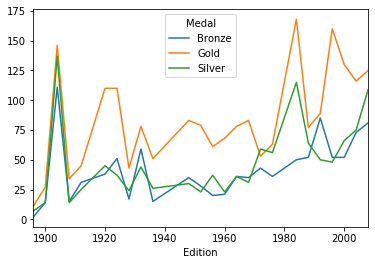

In [15]:
# Import matplotlib
import matplotlib.pyplot as plt

# Create the DataFrame: usa
usa = medals.loc[medals.NOC == 'USA']

# Group usa by ['Edition', 'Medal'] and aggregate over 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

# Plot the DataFrame usa_medals_by_year
usa_medals_by_year.plot()
plt.show()

**Note** : Namun, sulit untuk mendapatkan terlalu banyak wawasan dari visualisasi ini. Plot area, yang akan Anda buat pada latihan berikutnya, mungkin lebih bermanfaat.

### Visualizing USA Medal Counts by Edition: Area Plot

Seperti pada latihan sebelumnya, tugas Anda dalam latihan ini adalah memvisualisasikan jumlah medali dengan `'Edition'` untuk AS. Kali ini, Anda akan menggunakan plot area untuk melihat rinciannya dengan lebih baik.

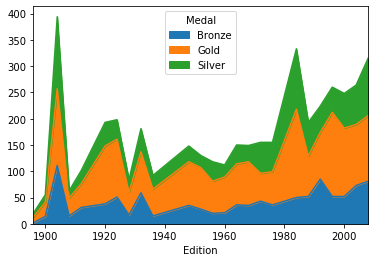

In [16]:
# Create the DataFrame: usa
usa = medals[medals.NOC == 'USA']

# Group usa by 'Edition', 'Medal', and 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area()
plt.show()

**Note** : Plot ini lebih mudah dipahami.

### Visualizing USA Medal Counts by Edition: Area Plot with Ordered Medals

Anda mungkin telah memperhatikan bahwa medali di urutkan sesuai dengan (kamus) leksikografis: `Bronze` < `Gold` < `Silver`. Namun, Anda lebih suka yang konsisten dengan aturan Olimpiade: `Bronze` < `Silver` < `Gold`.

Anda dapat mencapai ini menggunakan tipe `Categorical`. Dalam latihan terakhir ini, setelah mendefinisikan kembali kolom `'Medal'` dari DataFrame `medals`, Anda akan mengulangi plot area dari latihan sebelumnya untuk melihat perintah baru.

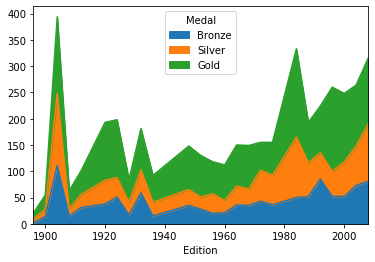

In [17]:
# Redefine 'Medal' as an ordered categorical
medals.Medal = pd.Categorical(values=medals.Medal, categories=['Bronze', 'Silver', 'Gold'], ordered=True)

# Create the DataFrame: usa
usa = medals[medals.NOC == 'USA']

# Group usa by 'Edition', 'Medal', and 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area()
plt.show()

Selamat! Anda telah mencapai akhir dari program ini - luangkan waktu untuk merenungkan segala sesuatu yang telah Anda pelajari!

*Jangan lupa mengunduh [Cheat Sheet](https://datacamp-community-prod.s3.amazonaws.com/9f0f2ae1-8bd8-4302-a67b-e17f3059d9e8) untuk kursus ini untuk melacak apa yang telah Anda pelajari hari ini!*